In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
state_abbr = ['AK', 'AL', 'AZ', 'AR', 'CA',
              'CO', 'CT', 'DE', 'FL', 'GA',
              'HI', 'ID', 'IL', 'IN', 'IA',
              'KS', 'KY', 'LA', 'ME', 'MD',
              'MA', 'MI', 'MN', 'MS', 'MO',
              'MT', 'NE', 'NV', 'NH', 'NJ',
              'NM', 'NY', 'NC', 'ND', 'OH',
              'OK', 'OR', 'PA', 'RI', 'SC',
              'SD', 'TN', 'TX', 'UT', 'VT',
              'VA', 'WA', 'WV', 'WI', 'WY'
             ]

In [26]:
deaths_true = pd.read_csv('../Data/Clean/deaths_NCHS_processed.csv')
# deaths_no_travel = pd.read_csv('deceased_df_no_air_travel.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
# deaths_travel = pd.read_csv('deceased_df_real_data.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
# deaths_travel_2 = pd.read_csv('deceased_df_real_data_2.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_no_travel = pd.read_csv('deceased_df_no_travel_real_data_3.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_travel_3 = pd.read_csv('deceased_df_real_data_3.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]

In [27]:
# deaths_true.drop('Week', axis=1, inplace=True)
deaths_no_travel.drop('unnamed', axis=1, inplace=True)
# deaths_travel.drop('unnamed', axis=1, inplace=True)
# deaths_travel_2.drop('unnamed', axis=1, inplace=True)
deaths_travel_3.drop('unnamed', axis=1, inplace=True)

In [28]:
deaths_true.head(3)

,State,DeathsFromPneumoniaAndInfluenza,Year,Week,Quarter
0,AK,3.0,2009,40,4
1,AK,3.0,2009,41,4
2,AK,3.0,2009,42,4


In [29]:
grouped = deaths_true.groupby(['Year', 'Quarter']).sum()

In [30]:
grouped

DeathsFromPneumoniaAndInfluenza   Week
Year Quarter                                        
2009 4                                52079.0  31096
2010 1                                55438.0   4732
     2                                44634.0  13520
     3                                40001.0  22308
     4                                48380.0  31096
2011 1                                62435.0   4732
     2                                47370.0  13520
     3                                40068.0  22308
     4                                46802.0  31096
2012 1                                54535.0   4732
     2                                44233.0  13520
     3                                39655.0  22308
     4                                48253.0  31096
2013 1                                68417.0   4732
     2                                44882.0  13520
     3                                38656.0  22308
     4                                45352.0  31096
2014 1                                59688.0   4732
     2                                44211.0  13520
     3                                38166.0  22308
     4                                51957.0  33852
2015 1                                66007.0   4732
     2                                45139.0  13520
     3                                38754.0  22308
     4                                44193.0  31096
2016 1                                55948.0   4732
     2                                43982.0  13520
     3                                37702.0  22308
     4                                44514.0  31096
2017 1                                61708.0   4732
     2                                43509.0  13520
     3                                36844.0  22308
     4                                46202.0  31096
2018 1                                72039.0   4732
     2                                41741.0  13520
     3                                35404.0  22308
     4                                41732.0  31096
2019 1                                45254.0   4056

In [31]:
deaths_no_travel['total_deaths'] = deaths_no_travel.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [32]:
deaths_no_travel

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,37,2,41,18,269,41,21,7,...,49,170,19,3,62,30,7,41,5,2255
2,2010,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,8
3,2010,2,5,4,9,5,34,10,8,11,...,11,20,4,2,11,6,7,8,5,450
4,2010,3,5,2,7,6,37,4,11,6,...,12,33,6,6,14,12,5,9,2,462
5,2010,4,11,3,10,10,33,9,7,2,...,8,26,7,3,14,4,6,4,5,446
6,2011,1,0,3,0,0,0,0,0,2,...,0,0,0,3,0,0,0,0,4,24
7,2011,2,8,3,9,7,12,7,6,10,...,3,6,3,3,3,3,7,5,7,284
8,2011,3,4,6,5,5,3,5,1,3,...,2,6,7,3,5,5,8,6,4,248
9,2011,4,6,1,5,2,7,6,3,3,...,3,3,4,5,4,12,6,3,4,251
10,2012,1,6,3,2,1,0,4,3,6,...,1,0,3,2,1,0,2,3,7,91


In [33]:
deaths_travel['total_deaths'] = deaths_travel.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [34]:
deaths_travel.head(3)

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,337,52,504,224,2829,349,248,7,...,484,1874,190,46,609,499,155,419,45,23029
2,2010,1,367,64,486,195,2821,384,268,6,...,501,1860,188,56,619,509,142,434,44,23199
3,2010,2,390,52,527,248,2811,395,277,7,...,480,1946,198,51,603,502,146,454,27,23542


In [35]:
deaths_travel_2['total_deaths'] = deaths_travel_2.drop(['Year', 'Quarter'], axis=1).sum(axis=1)
deaths_travel_3['total_deaths'] = deaths_travel_3.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [36]:
deaths_travel_3

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,1446,92,8336,637,58842,8171,1204,10,...,6280,49458,2315,63,10125,6632,119,3542,33,337247
2,2010,1,27,1,202,8,1588,241,40,0,...,170,1244,118,28,374,170,4,147,4,9887
3,2010,2,407,114,3029,218,18246,3458,432,7,...,2079,18242,988,51,3426,2143,54,1116,49,116813
4,2010,3,658,235,3118,410,16561,3358,681,5,...,2500,15069,1339,122,3561,2505,125,1624,123,118056
5,2010,4,681,113,3236,377,16601,3365,677,4,...,2368,15977,1313,114,3596,2229,119,1493,64,118244
6,2011,1,56,11,348,20,1247,337,58,2,...,231,1108,154,35,386,221,15,143,4,9949
7,2011,2,291,117,1710,177,5926,2163,353,3,...,1191,6818,787,84,1755,1160,71,712,47,54236
8,2011,3,397,230,1736,285,5379,1901,503,3,...,1333,5728,956,144,1777,1336,121,889,114,55135
9,2011,4,418,124,1671,261,5442,2032,452,2,...,1232,5939,927,92,1800,1215,121,851,57,54320
10,2012,1,71,63,445,60,1618,570,87,3,...,301,2091,289,48,740,427,35,190,35,17669


Text(0.5, 1.0, 'Total number of deaths per quarter')

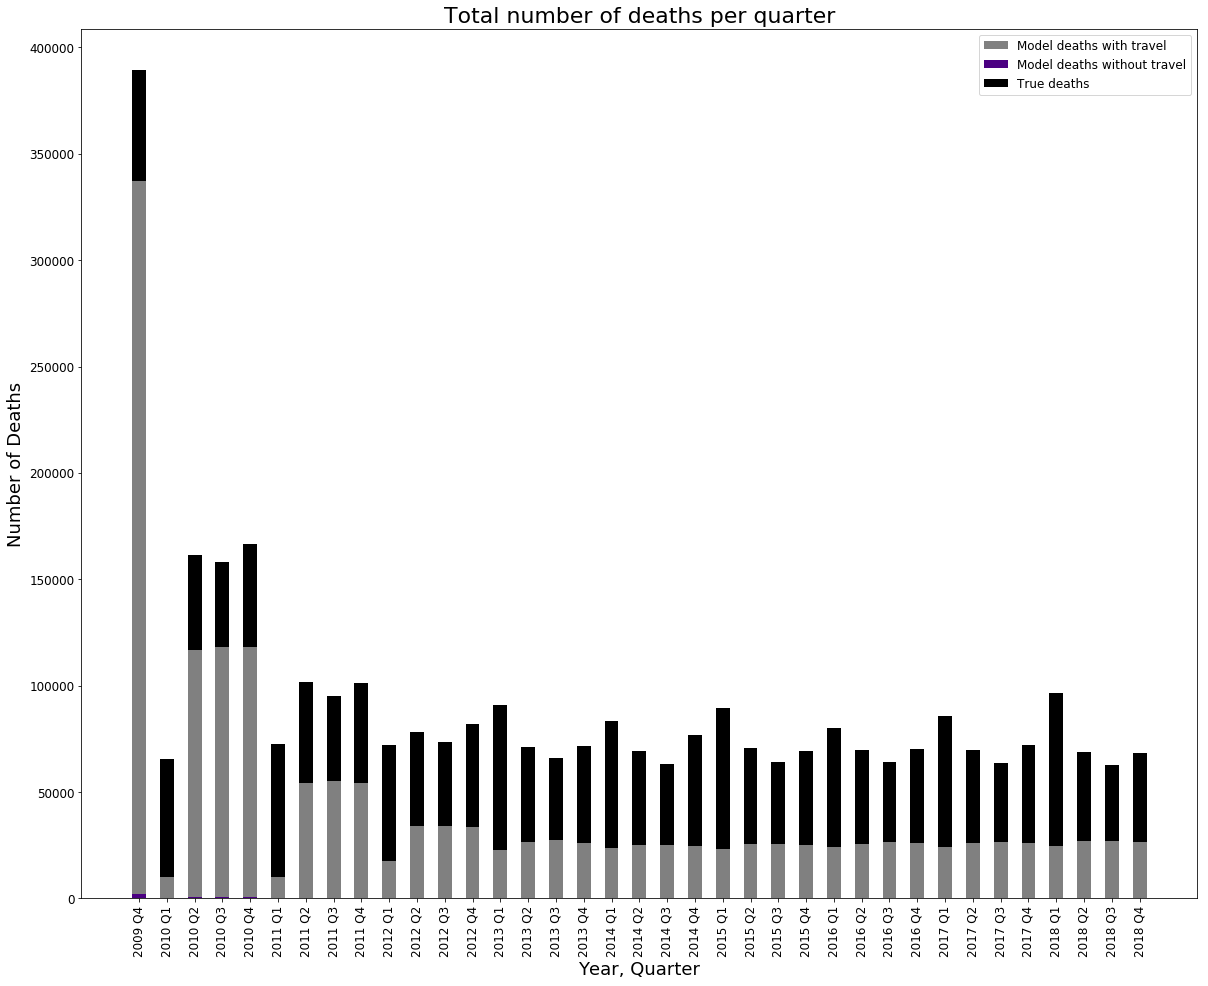

In [47]:
plt.figure(figsize=[20,16])
ind = np.arange(37)
width = 0.5
p1 = plt.bar(ind, deaths_travel_3['total_deaths'], width,
             bottom=deaths_no_travel['total_deaths'], color='grey')
p2 = plt.bar(ind, deaths_no_travel['total_deaths'], width, color='indigo')
#              bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, grouped['DeathsFromPneumoniaAndInfluenza'][:-1], width,
             bottom=deaths_travel_3['total_deaths'], color='black')

plt.xticks(ind, ('2009 Q4',
                '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
                '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4',
                '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4',
                '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
                '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4',
                '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4',
                '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4',
                '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4',
                '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4'), rotation=90)
# plt.yticks(np.arange(0, 81, 10))
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('Model deaths with travel', 'Model deaths without travel', 'True deaths'), fontsize='12')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Year, Quarter", fontsize=18)
plt.ylabel("Number of Deaths", fontsize=18)
plt.title("Total number of deaths per quarter", fontsize=22)

In [38]:
len(grouped['DeathsFromPneumoniaAndInfluenza'][:-1])

37

In [39]:
grouped['DeathsFromPneumoniaAndInfluenza'][-1]

45254.0

In [40]:
CA_deaths_true = deaths_true[(deaths_true['State'] == 'CA')].groupby(['State', 'Year', 'Quarter']).sum()
CO_deaths_true = deaths_true[(deaths_true['State'] == 'CO')].groupby(['State', 'Year', 'Quarter']).sum()
WY_deaths_true = deaths_true[(deaths_true['State'] == 'WY')].groupby(['State', 'Year', 'Quarter']).sum()

In [41]:
CA_deaths_true = CA_deaths_true['DeathsFromPneumoniaAndInfluenza']
CO_deaths_true = CO_deaths_true['DeathsFromPneumoniaAndInfluenza']
WY_deaths_true = WY_deaths_true['DeathsFromPneumoniaAndInfluenza']

Text(0.5, 1.0, 'Total number of deaths per state over all quarters')

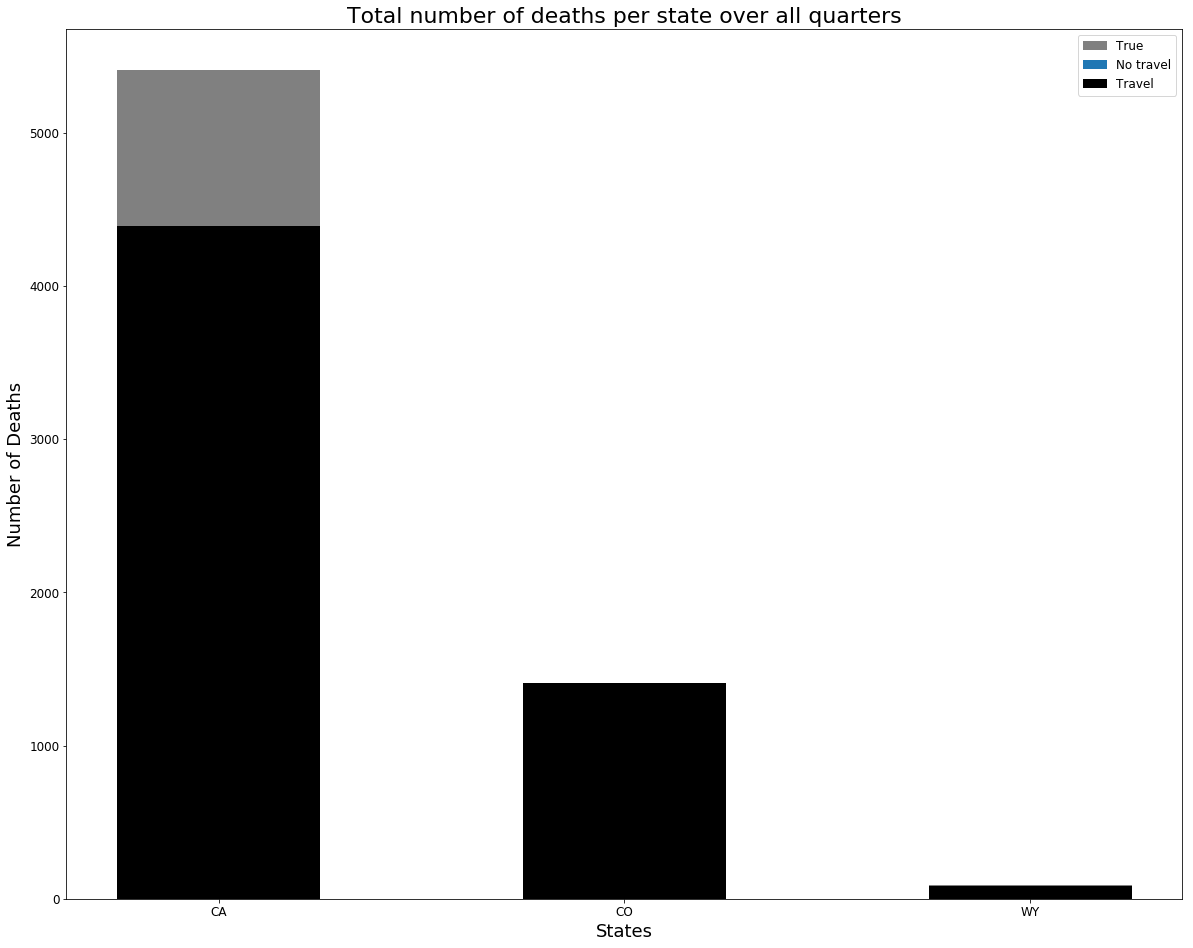

In [55]:
plt.figure(figsize=[20,16])
ind = np.arange(3)
width = 0.5

# CA = [np.mean(CA_deaths_true[:-1]), np.mean(deaths_no_travel['CA']), np.mean(deaths_travel_2['CA'])]
# CO = [np.mean(CO_deaths_true[:-1]), np.mean(deaths_no_travel['CO']), np.mean(deaths_travel_2['CO'])]
# WY = [np.mean(WY_deaths_true[:-1]), np.mean(deaths_no_travel['WY']), np.mean(deaths_travel_2['WY'])]

true = [np.mean(CA_deaths_true[:-1]), np.mean(CO_deaths_true[:-1]), np.mean(WY_deaths_true[:-1])]
no_travel = [np.mean(deaths_no_travel['CA']), np.mean(deaths_no_travel['CO']), np.mean(deaths_no_travel['WY'])]
travel = [np.mean(deaths_travel_3['CA']), np.mean(deaths_travel_3['CO']), np.mean(deaths_travel_3['WY'])]

p1 = plt.bar(ind, true, width, color='grey')
p2 = plt.bar(ind, no_travel, width)
#              bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, travel, width, color='black')

plt.xticks(ind, ('CA', 'CO', 'WY'), size=12)
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('True', 'No travel', 'Travel'), fontsize=12)
plt.yticks(size=12)
plt.xlabel("States", fontsize=18)
plt.ylabel("Number of Deaths", fontsize=18)
plt.title("Total number of deaths per state over all quarters", fontsize=22)